<a href="https://colab.research.google.com/github/kongqiahaha/python-/blob/master/keras%E4%BD%BF%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
sys.path.insert(0,"./drive/My Drive/data/keras使用")

In [2]:
#%tensorflow_version 2.x
import numpy as np
#import tensorflow as tf
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow



Using TensorFlow backend.


In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [0]:
def model(input_shape):
  X_input = Input(input_shape)
  X = ZeroPadding2D((3, 3))(X_input)
  X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
  X = BatchNormalization(axis = 3, name = 'bn0')(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2, 2), name='max_pool')(X)
  X = Flatten()(X)
  X = Dense(1, activation='sigmoid', name='fc')(X)
  model = Model(inputs = X_input, outputs = X, name='HappyModel')
  return model


In [0]:
def HappyModel(input_shape):
  X_input = Input(shape=input_shape)
  X = ZeroPadding2D(padding=(1, 1))(X_input)
  X = Conv2D(8, kernel_size=(3,3), strides=(1,1))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(X)
  X = ZeroPadding2D(padding=(1, 1))(X)
  X = Conv2D(16, kernel_size=(3,3), strides=(1,1))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(X)
  X = ZeroPadding2D(padding=(1, 1))(X)
  X = Conv2D(32, kernel_size=(3,3), strides=(1,1))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(X)
  X = Flatten()(X)
  Y = Dense(1, activation='sigmoid')(X)
  model = Model(inputs = X_input, outputs = Y, name='HappyModel')
  return model

In [6]:
happyModel = HappyModel((64, 64, 3))

In [7]:
import keras
happyModel.compile(optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0), loss='binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
happyModel.fit(x=X_train, y=Y_train, batch_size=16, epochs=20)



Epoch 1/20
600/600 [==============================] - 4s 7ms/step - loss: 0.5017 - acc: 0.7467
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.2021 - acc: 0.9417
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1351 - acc: 0.9733
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1073 - acc: 0.9733
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0880 - acc: 0.9833
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0757 - acc: 0.9817
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0529 - acc: 0.9900
Epoch 8/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0433 - acc: 0.9900
Epoch 9/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0371 - acc: 0.9933
Epoch 10/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0337 - acc: 0.9933
Epoch 11/20
600/600 [==========================

In [9]:
preds = happyModel.evaluate(x=X_test, y=Y_test)

150/150 [==============================] - 0s 3ms/step


In [10]:
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))


Loss = 0.07679854204257329
Test Accuracy = 0.980000003973643


ta看起来很快乐


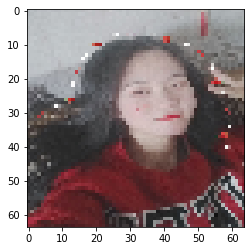

In [24]:

img_path = '3.jpg'

img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

predect=int(np.squeeze(happyModel.predict(x)))
if predect == 1:
  print("ta看起来很快乐")
else:
  print("ta看起来不快乐")